In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
#train_test_split를 정의 해줘야 하기에 아래 라이브러리 만들어줍니다.
from sklearn.model_selection import train_test_split
#경고창 삭제하기
import warnings
warnings.filterwarnings('ignore')


#폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import cross_val_score

X,y = make_moons(n_samples= 100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)

print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test,y_test)))

cvscores= cross_val_score(forest,X,y, cv=5)
print("테스트 세트 정확도 cv=5 : {:.3f}\n".format(cvscores.mean()))


cvscores= cross_val_score(forest,X,y, cv=10)
print("테스트 세트 정확도 cv=10 : {:.3f}\n".format(cvscores.mean()))


테스트 세트 정확도: 0.880

테스트 세트 정확도 cv=5 : 0.860

테스트 세트 정확도 cv=10 : 0.840



In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

X,y = make_moons(n_samples= 100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

dt=DecisionTreeClassifier(max_depth=None,min_samples_split=2,random_state=0)
dt.fit(X_train,y_train)

print("테스트 세트 정확도: {:.3f}\n".format(dt.score(X_test,y_test)))

cvscores= cross_val_score(dt,X,y, cv=5)
print("테스트 세트 정확도 cv=5 : {:.3f}\n".format(cvscores.mean()))


cvscores= cross_val_score(dt,X,y, cv=10)
print("테스트 세트 정확도 cv=10 : {:.3f}\n".format(cvscores.mean()))


테스트 세트 정확도: 0.840

테스트 세트 정확도 cv=5 : 0.860

테스트 세트 정확도 cv=10 : 0.850



In [ ]:
#랜덤 포레스트와 Dicision tree 비교를 해보니 테스트 정확도는 랜덤 포레스트가 더 좋았습니다.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data,cancer.target,stratify=cancer.target,random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=2)
forest.fit(X_train,y_train)


print("훈련 세트 점수: {: .3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 점수: {: .3f}".format(forest.score(X_test,y_test)))

훈련 세트 점수:  1.000
테스트 세트 점수:  0.951


In [ ]:
#cancer data에서도 선형 모델이나 단일 결정 트리보다 높은 정확도를 나타낸다

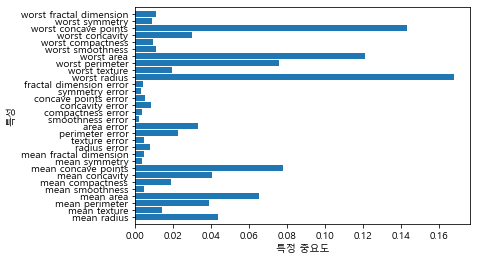

In [9]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특정 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)

plot_feature_importances_cancer(forest)

In [ ]:
#랜덤 포레스트에서는 단일 트리의 경우보다 훨씬 많은 특성이 0이상의 중요도 값을 갖는다
#랜덤포레스트에는 단일 트리보다 더 넓은 시각으로 데이터를 바라 볼수가 있었습니다.

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
cancer.data,cancer.target,stratify=cancer.target,random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("훈련 세트 점수: {: .3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 점수: {: .3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 점수:  1.000
테스트 세트 점수:  0.958


In [ ]:
#훈련 세트의 정확도가 100퍼이므로 과대적합된 것으로 보입니다
#과대적합을 막기 위해서 트리의 최대 깊이를 줄여 가지치기를 강하게 하거나 학습률을
#낮출수 있다고 합니다.

In [11]:
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("훈련 세트 점수: {: .3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 점수: {: .3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 점수:  0.995
테스트 세트 점수:  0.944


In [ ]:
#다음 같이 최대 깊이를 낮추는 것으로 모델 성능 향상에 크게 기여 했습니다.

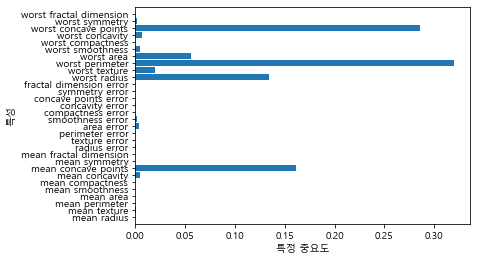

In [12]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

In [ ]:
#그레디언트 부스팅 트리의 특성 중요도는 랜덤 포레스트와 비슷 해 보입니다.
#하지만 일부 특성을 완전히 무시하고 있습니다
#예측 시간이나 머신러닝 모델에서 마지막 성능까지 쥐어짜야 할때 그레이디언트 부스팅
#이 더 장점이 있어 보입니다.